## Import Libraries

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from keras.models import Model
from keras.optimizers import Adam
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

## Data Visualization

Text(0.5, 1.0, 'Number of Training images per Class:')

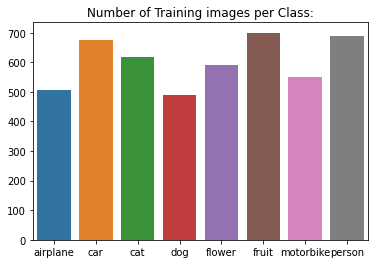

In [4]:
train_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train"
val_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/"
test_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/"
class_names = sorted(os.listdir(train_data_dir))

train_img_cat = []
val_img_cat = []
test_img_cat = []
for classes in class_names:
    train_folder = train_data_dir + '/' + classes
    train_img_cat.append(len(os.listdir(train_folder)))

for classes in class_names:
    val_folder = val_data_dir + '/' + classes
    val_img_cat.append(len(os.listdir(val_folder)))

for classes in class_names:
    test_folder = test_data_dir + '/' + classes
    test_img_cat.append(len(os.listdir(test_folder)))

sns.barplot(x=class_names, y=train_img_cat).set_title("Number of Training images per Class:")

Text(0.5, 1.0, 'Number of Validation images per Class:')

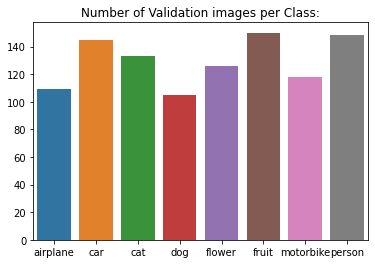

In [5]:
sns.barplot(x=class_names, y=val_img_cat).set_title("Number of Validation images per Class:")

Text(0.5, 1.0, 'Number of Testing images per Class:')

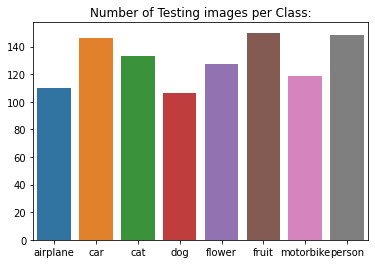

In [6]:
sns.barplot(x=class_names, y=test_img_cat).set_title("Number of Testing images per Class:")

## Data Augmentation

In [9]:
train = ImageDataGenerator(rescale= 1/255,
                           rotation_range=10,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           brightness_range=(0.9,1.1),
                           fill_mode='nearest'
                           )
val = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale= 1/255)

train_data = train.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical')
val_data = val.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/',
                                      target_size=(256,256), 
                                      shuffle = False,
                                      batch_size=32,
                                      class_mode='categorical')

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


## Transfer learning model
## DenseNet121

In [ ]:
image_size = (256,256,3)

# Add Pre-processing layer
Dense_model = DenseNet121(input_shape = image_size, weights = 'imagenet', include_top = False)

# don't train existing weights
for layer in Dense_model.layers:
  layer.trainable = False

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(Dense_model.output)
prediction = Dense(8, activation='softmax')(x)

### Summary of the model

In [ ]:
# create a model object
model = Model(inputs=Dense_model.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
learning_rate = 5e-5

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])

## Fitting the model

In [ ]:
# fitting the model
result = model.fit(
  train_data,
  steps_per_epoch=20,
  epochs=10,
  validation_data=val_data
  )
model.save('/content/drive/MyDrive/Thesis_Natural_Images/DenseNet121.h5')

Epoch 1/10
20/20 [==============================] - 794s 40s/step - loss: 0.9793 - accuracy: 0.6797 - val_loss: 0.1290 - val_accuracy: 0.9700
Epoch 2/10
20/20 [==============================] - 443s 22s/step - loss: 0.0996 - accuracy: 0.9797 - val_loss: 0.0495 - val_accuracy: 0.9865
Epoch 3/10
20/20 [==============================] - 414s 21s/step - loss: 0.0446 - accuracy: 0.9875 - val_loss: 0.0349 - val_accuracy: 0.9894
Epoch 4/10
20/20 [==============================] - 380s 19s/step - loss: 0.0402 - accuracy: 0.9891 - val_loss: 0.0293 - val_accuracy: 0.9913
Epoch 5/10
20/20 [==============================] - 362s 18s/step - loss: 0.0204 - accuracy: 0.9984 - val_loss: 0.0289 - val_accuracy: 0.9894
Epoch 6/10
20/20 [==============================] - 332s 17s/step - loss: 0.0275 - accuracy: 0.9937 - val_loss: 0.0328 - val_accuracy: 0.9903
Epoch 7/10
20/20 [==============================] - 327s 16s/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0244 - val_accuracy: 0.9932
Epoch 

## Testing

In [ ]:
prediction = model.evaluate(test_data, batch_size = 32)
prediction

33/33 [==============================] - 514s 16s/step - loss: 0.0323 - accuracy: 0.9913


[0.03230989724397659, 0.9913378357887268]

## Model Evaluation

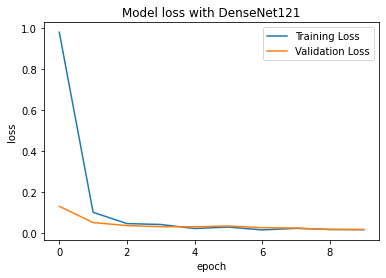

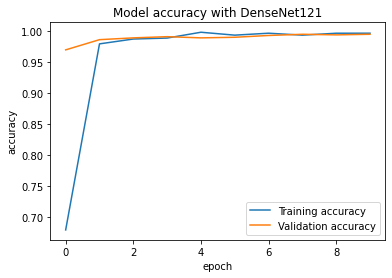

In [ ]:
# Plot.py

plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Model loss with DenseNet121')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(result.history['accuracy'], label='Training accuracy')
plt.plot(result.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy with DenseNet121')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Confusion Matrix

In [14]:
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
DN121 = keras.models.load_model('/content/drive/MyDrive/Thesis_Natural_Images/DenseNet121.h5')

In [10]:
#Confution Matrix and Classification Report

Y_pred = DN121.predict(test_data, 32)
y_pred = np.argmax(Y_pred, axis=1)

In [15]:
cm = confusion_matrix(test_data.classes, y_pred)
cm_plot_labels = class_names
print(cm_plot_labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


Confusion matrix, without normalization
[[109   0   0   1   0   0   0   0]
 [  0 146   0   0   0   0   0   0]
 [  0   0 126   6   0   1   0   0]
 [  0   1   0 105   0   0   0   0]
 [  0   0   0   0 127   0   0   0]
 [  0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0 119   0]
 [  0   0   0   0   0   0   0 148]]
None


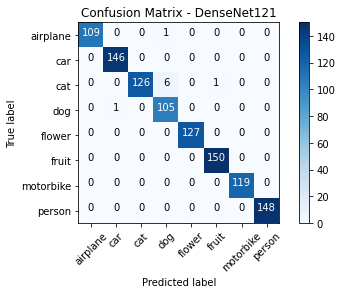

In [16]:
print(plot_confusion_matrix(cm, classes = cm_plot_labels, title='Confusion Matrix - DenseNet121', normalize=False))

## Classification Report

In [18]:
print('Classification Report for DenseNet121')
print(classification_report(test_data.classes, y_pred, target_names=class_names))

Classification Report for DenseNet121
              precision    recall  f1-score   support

    airplane       1.00      0.99      1.00       110
         car       0.99      1.00      1.00       146
         cat       1.00      0.95      0.97       133
         dog       0.94      0.99      0.96       106
      flower       1.00      1.00      1.00       127
       fruit       0.99      1.00      1.00       150
   motorbike       1.00      1.00      1.00       119
      person       1.00      1.00      1.00       148

    accuracy                           0.99      1039
   macro avg       0.99      0.99      0.99      1039
weighted avg       0.99      0.99      0.99      1039

